# 1. Introduction

Selon un jeu de données fourni par la société cliente (BPI) nous sommes missionnés d'identifier 5 startups qui sortiraient du lot de par leur potentiel. Il convient alors d'établir un modèle suivant l'évolution du profit de ces startups. Dans cette étude, nous allons tester les paramètres qui nous sont données entre eux afin de prédire au mieux possible un profit théorique d'une startup dont on ne connait pas encore les investissements.

#  2. Découverte du dataset

##  2.1 Survoler nos données

In [15]:
#import des principales librairies utilisées tout au long de ce notebook

import numpy as np #data manipulation
import pandas as pd  #data-wrangling
import matplotlib.pyplot as plt #datavizu
import seaborn as sns  #datavizu
from random import randint

#disable all warnings 
import warnings
warnings.filterwarnings('ignore')
import pprint

In [107]:
#CSV to DATAFRAME
df = pd.read_csv(
'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/2120d261-1446-43e8-b0eb-a681e66d738a.csv'
        ,sep=';')

#dataset = pd.read_csv('TP_licornes.csv', sep=';')

#sample view
df.head(5)

,R&D,Administration,Marketing,villes,Profit
0,165349.20,136897.80,471784.10,Paris,192261.83
1,162597.70,151377.59,443898.53,Strasbourg,191792.06
2,153441.51,101145.55,407934.54,Lyon,191050.39
3,144372.41,118671.85,383199.62,Paris,182901.99
4,142107.34,91391.77,366168.42,Lyon,166187.94


In [108]:
#Trouvons le nombre de zéros
df.isnull().sum()

R&D               0
Administration    0
Marketing         0
villes            0
Profit            0
dtype: int64

In [109]:
#Vérifions les valeurs non renseignées
df.isna().sum()

R&D               0
Administration    0
Marketing         0
villes            0
Profit            0
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   villes          50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Nous avons donc 4 variables float et 1 variable de type objet

In [111]:
df.describe()

,R&D,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Notre échantillon comporte 50 lignes toutes non-nulles

##  2.1 Comprendre nos features

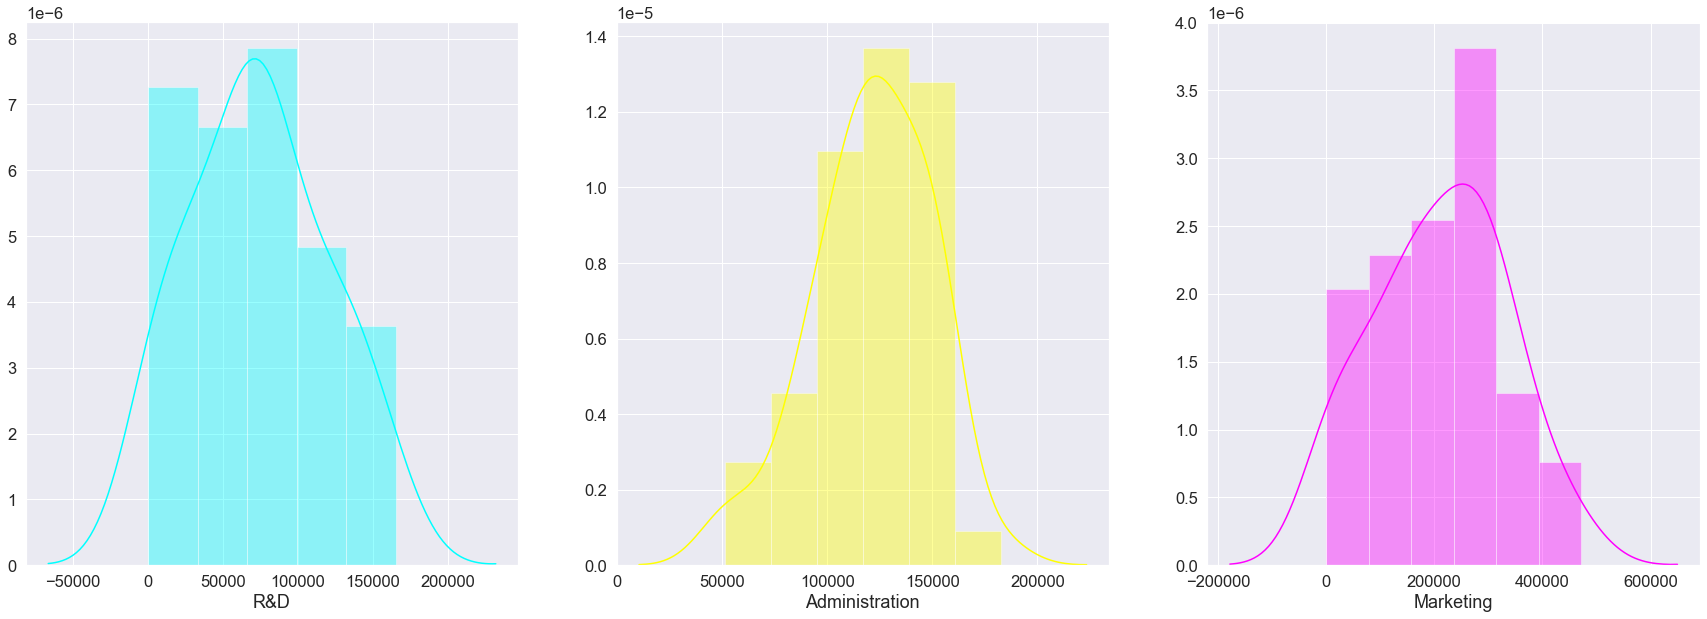

In [117]:
#front-end de seaborn
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)

#couleur aléatoire pour les graph
def random_color():
    rgbl=['green','red','cyan','magenta','yellow','orange']
    return rgbl[randint(0,7)]

#créer 3 subplots vide
fig, axes = plt.subplots(1,3,figsize=(30,10))

#charge les subplots avec les données des secteurs d'activités
for i in range(len(df.columns)-2):
    sns.distplot(df[df.columns[i]], ax=axes[i], color = random_color())

#montrer les graphs
plt.show()

Pourquoi ces graphs ?
-> Ils nous montrent que les 3 domaines d'investissement suivent une loi normale et qu'il y a une certaine cohérence avec la distribution de notre échantillon

On peut aussi s'en assurer par le test de Shapiro-Wilk ;

In [118]:
from scipy import stats

shapiro_test = stats.shapiro(df[["R&D","Administration","Marketing","Profit"]])

shapiro_test

ShapiroResult(statistic=0.890811026096344, pvalue=6.788404560698069e-11)

Notre p-value est très en dessous d'un seuil qui sera défini à 0.05 (5%)
On en tire donc les conclusions que la condition de loi normale de notre échantillon est bien respectée

## 2.3 Une avance sur les corrélations

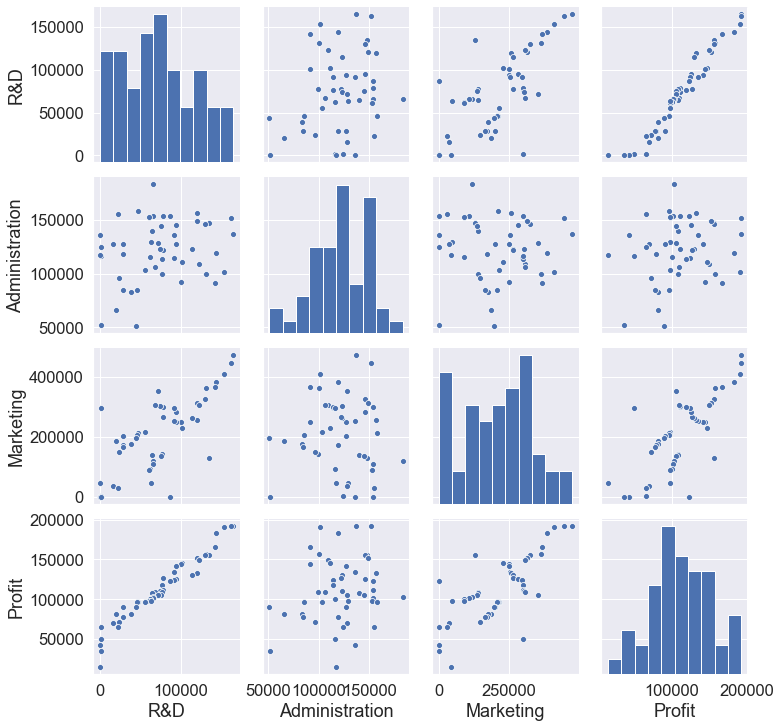

In [119]:
sns.pairplot(df)

Cette fonction de seaborn fait ressortir que la R&D est la variable (feature) la plus correlée avec le profit.

Mais on peut aussi le constater avec les fonctions suivantes : 

In [120]:
df.corr()

,R&D,Administration,Marketing,Profit
R&D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


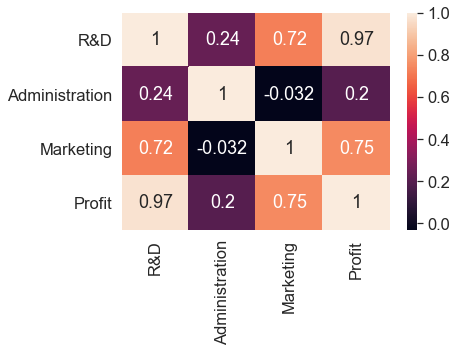

In [121]:
sns.heatmap(df.corr(), annot=True)

Avec une corrélation de 0.97, ** la R&D est donc le contributeur principal du profit**.

# 3. Préparation des données

# 3.1 Création du modèle

In [122]:
#On utilise la libraire SciKitlearn et importe la classe train_test_split et LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [123]:
#features
#X sont les variables indépendantes (R&D,Marketing,Administration, Ville)
X = df.iloc[:,:-1].values
#prédiction
#y sont les variables dépendantes (Profit)
y = df.iloc[:,4].values

In [124]:
#utilisation du module pprint (PrettyPrint)
#C'est plus joli qu'un print classique non ?
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(X)

array([[165349.2, 136897.8, 471784.1, 'Paris'],
       [162597.7, 151377.59, 443898.53, 'Strasbourg'],
       [153441.51, 101145.55, 407934.54, 'Lyon'],
       [144372.41, 118671.85, 383199.62, 'Paris'],
       [142107.34, 91391.77, 366168.42, 'Lyon'],
       [131876.9, 99814.71, 362861.36, 'Paris'],
       [134615.46, 147198.87, 127716.82, 'Strasbourg'],
       [130298.13, 145530.06, 323876.68, 'Lyon'],
       [120542.52, 148718.95, 311613.29, 'Paris'],
       [123334.88, 108679.17, 304981.62, 'Strasbourg'],
       [101913.08, 110594.11, 229160.95, 'Lyon'],
       [100671.96, 91790.61, 249744.55, 'Strasbourg'],
       [93863.75, 127320.38, 249839.44, 'Lyon'],
       [91992.39, 135495.07, 252664.93, 'Strasbourg'],
       [119943.24, 156547.42, 256512.92, 'Lyon'],
       [114523.61, 122616.84, 261776.23, 'Paris'],
       [78013.11, 121597.55, 264346.06, 'Strasbourg'],
       [94657.16, 145077.58, 282574.31, 'Paris'],
       [91749.16, 114175.79, 294919.57, 'Lyon'],
       [86419.7, 1535

In [125]:
pp.pprint(y)

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])


A ce point, on va commencer à créer notre modèle.
Cependant, nous avons 4 features dont une catégorique : les villes (string)
Il faudrait les transformer en nombre car on ne fait pas de machine learning avec des strings, mais seulement de nombres!

In [126]:
#import des fonctions d'encodage

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

# On encode toute la colonne 'villes'
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Travailler sur la variable catégorique "villes"
ct = ColumnTransformer([("villes", OneHotEncoder(), [3])], remainder = 'passthrough')

#on applique la méthode à notre matrice X                               
# on crée des var de test(donc plusieurs colonnes représentant les villes)
X = ct.fit_transform(X)
print(X)

[[0.0 1.0 0.0 165349.2 136897.8 471784.1]
 [0.0 0.0 1.0 162597.7 151377.59 443898.53]
 [1.0 0.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 0.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 0.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 134615.46 147198.87 127716.82]
 [1.0 0.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 120542.52 148718.95 311613.29]
 [0.0 0.0 1.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 1.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 1.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 0.0 114523.61 122616.84 261776.23]
 [0.0 0.0 1.0 78013.11 121597.55 264346.06]
 [0.0 1.0 0.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [0.0 0.0 1.0 76253.86 113867.3 298664.47]
 [0.0 1.0 0.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [127]:
#éviter la multicolinéairté

X = X[:,1:]
print(X)

[[1.0 0.0 165349.2 136897.8 471784.1]
 [0.0 1.0 162597.7 151377.59 443898.53]
 [0.0 0.0 153441.51 101145.55 407934.54]
 [1.0 0.0 144372.41 118671.85 383199.62]
 [0.0 0.0 142107.34 91391.77 366168.42]
 [1.0 0.0 131876.9 99814.71 362861.36]
 [0.0 1.0 134615.46 147198.87 127716.82]
 [0.0 0.0 130298.13 145530.06 323876.68]
 [1.0 0.0 120542.52 148718.95 311613.29]
 [0.0 1.0 123334.88 108679.17 304981.62]
 [0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 100671.96 91790.61 249744.55]
 [0.0 0.0 93863.75 127320.38 249839.44]
 [0.0 1.0 91992.39 135495.07 252664.93]
 [0.0 0.0 119943.24 156547.42 256512.92]
 [1.0 0.0 114523.61 122616.84 261776.23]
 [0.0 1.0 78013.11 121597.55 264346.06]
 [1.0 0.0 94657.16 145077.58 282574.31]
 [0.0 0.0 91749.16 114175.79 294919.57]
 [1.0 0.0 86419.7 153514.11 0.0]
 [0.0 1.0 76253.86 113867.3 298664.47]
 [1.0 0.0 78389.47 153773.43 299737.29]
 [0.0 0.0 73994.56 122782.75 303319.26]
 [0.0 0.0 67532.53 105751.03 304768.73]
 [1.0 0.0 77044.01 99281.34 140574.81]
 [0

## 3.2 Entrainement

In [128]:
#On sépare les variables indépendantes et dépendantes de manière aléatoire en 2 groupes (test et train)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [129]:
#On initialise la régression linéaire
regressor = LinearRegression()

In [130]:
#On produit un modèle à partir des données d'entrainement
regressor.fit(X_train, y_train)

LinearRegression()

In [131]:
#Nous avons ainsi un modèle pouvant prédire y.
y_pred = regressor.predict(X_test)

In [132]:
#comparons le profit réel vs le profit prédit
#numpy.nditer permet d'itérer un array

for i,j in np.nditer((y_test, y_pred)):
    print(i,"   -->   ", j)  

103282.38    -->    111616.64259435349
144259.4    -->    132709.39466309024
146121.95    -->    140155.1103375957
77798.83    -->    76099.20398176197
191050.39    -->    186329.94240311027
105008.31    -->    112822.19807244225
81229.06    -->    63002.00394821789
97483.56    -->    99107.1042810347
110352.25    -->    119287.7547335141
166187.94    -->    175522.8386468471
96778.92    -->    101000.69861481125
96479.51    -->    85772.9929324359
105733.54    -->    117713.7648150632
96712.8    -->    90230.88085211253
124266.9    -->    133375.04389416258
155752.6    -->    167530.54765779755
132602.65    -->    158013.54602021637


## 3.3 Analyse de notre premier modèle

In [133]:
#On compare les données de test avec les prédictions
#print(sklearn.metrics.accuracy_score(Y, y_pred)

#afficher le score R² du train sample
print("R2_train :",regressor.score(X_train, y_train))
#trouver notre coefficient du modèle
print("Coefficients :",regressor.coef_)
#notre constante issu de l'hypothèse H0
print("y pour (x1,...,xn)=0 :",regressor.predict([[0,0,0,0,0]]))

#afficher nos scores R²
print("Train sample :",regressor.score(X_train, y_train))
print("Test sample :",regressor.score(X_test,y_test))

R2_train : 0.9576035764205424
Coefficients : [-6.26486506e+03 -5.92663381e+03  8.28371991e-01  5.03972419e-02
  2.21861926e-02]
y pour (x1,...,xn)=0 : [45075.32230849]
Train sample : 0.9576035764205424
Test sample : 0.8752655285787139


Le R² de notre échantillon Train tend vers 1 ce qui signifie qu'on va pouvoir en tirer quelque chose. 
Notre test sample lui, n'est pas très éloigné du train sample, il va falloir améliorer cela.

R2 est très proche de 1, nous assurant donc la validité du modèle.  
Nous obtenons ainsi une formule type :

$y$ $=$ $41011.48935223$ + $0.828371991$ $X_R$ + $0.0503972419$ $X_M$ + $0.0221861926$ $X_A$ + $0.0062648$ $X_V$

Où $y$ représente le profit  
$X_R$ les dépenses en R&D  
$X_A$ les dépenses en Administratif  
$X_M$ les dépenses en Marketing  
$X_V$ la géolocalisation (encodé)

# 4. Trouver le modèle optimal

## 4.1 Utilisation de la méthode Backward Elimination

**Backward Elimination**
C'est une méthode de sélection des features dans un modèle de machine learning. 
L'objectif est d'arriver à un modèle déchargé des features qui n'ont pas vraiment d'intérêt significatif vis-à-vis de notre variable dépendante (Profit) et sa prédiction en sortie.

On va donc simplifier notre modèle

Basé sur notre analyse du début, on va surement pouvoir confirmer nos hypothèses déduites des corrélations ; seul la R&D est hautement significative dans la prédiction du y : Profit

Les features non nécessaires augmentent la complexité du modèle et si l'on veut le meilleur résultat il faut le garder simple.

## 4.2 Préparation

Par défaut la formule prend pas de constante donc on va essayer de surpasser ça en créant une colonne de 1 tel que $\theta_0$ * $X_0$ = 1 que l'on place au début de $X$

In [49]:
X = np.append(arr  = np.ones((50,1)).astype(int),values = X, axis = 1)
print(X)

[[1 1 1.0 0.0 165349.2 136897.8 471784.1]
 [1 1 0.0 1.0 162597.7 151377.59 443898.53]
 [1 1 0.0 0.0 153441.51 101145.55 407934.54]
 [1 1 1.0 0.0 144372.41 118671.85 383199.62]
 [1 1 0.0 0.0 142107.34 91391.77 366168.42]
 [1 1 1.0 0.0 131876.9 99814.71 362861.36]
 [1 1 0.0 1.0 134615.46 147198.87 127716.82]
 [1 1 0.0 0.0 130298.13 145530.06 323876.68]
 [1 1 1.0 0.0 120542.52 148718.95 311613.29]
 [1 1 0.0 1.0 123334.88 108679.17 304981.62]
 [1 1 0.0 0.0 101913.08 110594.11 229160.95]
 [1 1 0.0 1.0 100671.96 91790.61 249744.55]
 [1 1 0.0 0.0 93863.75 127320.38 249839.44]
 [1 1 0.0 1.0 91992.39 135495.07 252664.93]
 [1 1 0.0 0.0 119943.24 156547.42 256512.92]
 [1 1 1.0 0.0 114523.61 122616.84 261776.23]
 [1 1 0.0 1.0 78013.11 121597.55 264346.06]
 [1 1 1.0 0.0 94657.16 145077.58 282574.31]
 [1 1 0.0 0.0 91749.16 114175.79 294919.57]
 [1 1 1.0 0.0 86419.7 153514.11 0.0]
 [1 1 0.0 1.0 76253.86 113867.3 298664.47]
 [1 1 1.0 0.0 78389.47 153773.43 299737.29]
 [1 1 0.0 0.0 73994.56 122782.75 3

## 4.2 Mise en application

In [53]:
import statsmodels.api as sm

In [54]:
#on initialise notre X optimisé en vérifiant que ce soit bien uniquement des float
X_opt =X[:, [0,1,2,3,4,5]].astype(float)
# 0 = fake constante
# 1,2 = ville encodée
# 3 = R&D
# 4 = Administration
# 5 = Marketing


regressor_OLS = sm.OLS(y,X_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.90e-28
Time:                        21:30:24   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.785e+04   3251.266      8.565      0.000    2.13e+04    3.44e+04
x1          2.785e+04   3251.266      8.565      0.000    2.13e+04    3.44e+04
x2         -1130.4509   3344.220     -0.338      0.737   -7866.055    5605.154
x3         -1091.1075   3377.087     -0.323      0.748   -7892.910    5710.695
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     2.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
X_opt =X[:, [0,1,3,4,5]].astype(float)   # on supprime x2 (ville) car p>SL (significant level = 0.5)
regressor_OLS = sm.OLS(y,X_opt).fit()     #    p>SL (0.953 > 0.05)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.68e-29
Time:                        21:30:30   Log-Likelihood:                -526.82
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.755e+04   3096.577      8.896      0.000    2.13e+04    3.38e+04
x1          2.755e+04   3096.577      8.896      0.000    2.13e+04    3.38e+04
x2          -502.8903   2866.249     -0.175      0.861   -6272.350    5266.570
x3             0.8613      0.031     27.974      0.000       0.799       0.923
x4            -0.0528      0.050     -1.058      0.296      -0.153       0.048
==============================================================================
Omnibus:                       14.294   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.252
Skew:                          -0.956   Prob(JB):                     6.60e-05
Kurtosis:                       5.364   Cond. No.                     1.43e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
X_opt =X[:, [0,3,4,5]].astype(float)   # on supprime x1 (ville) car p>SL (significant level = 0.5)
regressor_OLS = sm.OLS(y,X_opt).fit()     #    p>SL (0.943 > 0.05)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.68e-29
Time:                        21:30:33   Log-Likelihood:                -526.82
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      46   BIC:                             1069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.509e+04   6193.154      8.896      0.000    4.26e+04    6.76e+04
x1          -502.8903   2866.249     -0.175      0.861   -6272.350    5266.570
x2             0.8613      0.031     27.974      0.000       0.799       0.923
x3            -0.0528      0.050     -1.058      0.296      -0.153       0.048
==============================================================================
Omnibus:                       14.294   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.252
Skew:                          -0.956   Prob(JB):                     6.60e-05
Kurtosis:                       5.364   Cond. No.                     6.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X_opt =X[:, [0,3,5]].astype(float)   # on supprime x4 (administration) car p>SL (significant level = 0.5)
regressor_OLS = sm.OLS(y,X_opt).fit()     #    p>SL (0.608 > 0.05)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.518
Date:                Sun, 17 Jan 2021   Prob (F-statistic):              0.230
Time:                        21:30:33   Log-Likelihood:                -599.09
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.145e+04   2.57e+04      3.169      0.003    2.97e+04    1.33e+05
x1         -1.203e+04   1.19e+04     -1.010      0.318    -3.6e+04    1.19e+04
x2             0.2856      0.203      1.404      0.167      -0.124       0.695
==============================================================================
Omnibus:                        0.326   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.464
Skew:                           0.165   Prob(JB):                        0.793
Kurtosis:                       2.663   Cond. No.                     5.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X_opt =X[:, [0,3]].astype(float)   # on supprime x5 (marketing) car p>SL (significant level = 0.5)
regressor_OLS = sm.OLS(y,X_opt).fit() #    p>SL (0.06 > 0.05)
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Sun, 17 Jan 2021   Prob (F-statistic):              0.312
Time:                        21:30:35   Log-Likelihood:                -600.12
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.162e+05   7013.324     16.567      0.000    1.02e+05     1.3e+05
x1         -1.228e+04    1.2e+04     -1.021      0.312   -3.65e+04    1.19e+04
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Application du modèle optimal de Régression Linéaire

In [144]:
#On extrait nos variables dépendantes et indépendantes
x_BE= df.iloc[:,[0]].values  
y_BE= df.iloc[:, -1].values  

In [145]:
x_BE_train, x_BE_test, y_BE_train, y_BE_test= train_test_split(x_BE, y_BE, test_size= 0.20, random_state=0)  

In [146]:
#nouvelle régression
regressor_BE= LinearRegression()  
regressor_BE.fit(np.array(x_BE_train).reshape(-1,1), y_BE_train)  

LinearRegression()

In [147]:
#nouveau prédicteur
y_pred= regressor_BE.predict(x_BE_test)  

In [148]:
#on compare à nouveau le Profit réel vs le Profit prédit
for i,j in np.nditer((y_BE_test,y_pred)):
    print(i,"   -->   ", j)

103282.38    -->    104667.27805997859
144259.4    -->    134150.8341057847
146121.95    -->    135207.80019516923
77798.83    -->    72170.54428855635
191050.39    -->    179090.5860250835
105008.31    -->    109824.77386586338
81229.06    -->    65644.27773756775
97483.56    -->    100481.43277138655
110352.25    -->    111431.75202432103
166187.94    -->    169438.14843539096


Si l'on remonte plus haut, pour comparer avec notre ancien modèle... on s'est pas mal amélioré dans la prédiction !
Passons à la visualisation

In [149]:
#On compare les données de test avec les prédictions
#print(sklearn.metrics.accuracy_score(Y, y_pred)

#afficher le score R² du train sample
print("R2_train :",regressor_BE.score(x_BE_train, y_BE_train))
#trouver notre coefficient du modèle
print("Coefficients :",regressor_BE.coef_)
#notre constante issu de l'hypothèse H0
print("y pour (x1,...,xn)=0 :",regressor_BE.predict([[0]]))

R2_train : 0.9449589778363044
Coefficients : [0.8516228]
y pour (x1,...,xn)=0 : [48416.29766139]


$y$ $=$ $48416.29766139$ + $0.8516228$ $X_R$

# 6. Visualisation

## 6.1 R&D -- Profit

Maintenant que l'on sait que notre modèle est plus performant en utilisant uniquement la variable "R&D" on peut visualiser la relation R&D / Profit

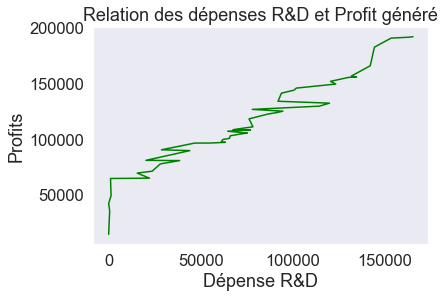

In [64]:
plt.plot(df.iloc[:,0], df.iloc[:, 4], color = 'green')
plt.xlabel('Dépense R&D')
plt.ylabel('Profits')
plt.title('Relation des dépenses R&D et Profit généré')
plt.grid()

## 6.2 Résultats du Train sample 

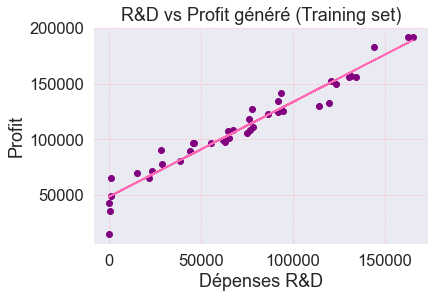

In [65]:
plt.scatter(x_BE_train, y_BE_train, color = 'purple')
plt.plot(x_BE_train, regressor.predict(x_BE_train), color = 'hotpink')
plt.title('R&D vs Profit généré (Training set)')
plt.xlabel('Dépenses R&D')
plt.ylabel('Profit')
plt.grid(color='pink', linestyle='-.', linewidth=0.7)
plt.show()

## 6.3 Résultats du Train sample 

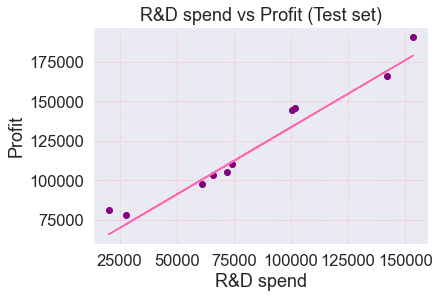

In [66]:
plt.scatter(x_BE_test, y_BE_test, color = 'purple')
plt.plot(x_BE_test, regressor.predict(x_BE_test), color = 'hotpink')
plt.title('R&D spend vs Profit (Test set)')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
plt.grid(color = 'pink', linestyle='-.', linewidth=0.7)
plt.show()

# 7. Analyse

## 7.1 Top 5

La problématique de ce jeu de donnée posée par le client demande de repérer les 5 startups les plus prometteuses.
Nous avons à notre disposition : 
Une relation démontrée entre les dépenses R&D et le Profit généré
Un modèle de données optimisé permettant de prédire la variable dépendante "Profit"

Comment identifier à partir de là, 5 startups qui seraient plus prometteuse que les autres ?
Il suffit d'établir un ratio entre R&D et Profit

In [67]:
#on reprend notre DF de base, contenant les données initiales
sub_df = df.copy()

#ligne
for i in range(len(df[["R&D"]])):
    
    liste = []
    
#colonne
    for y in range(len(df[["R&D"]].columns)):
        
        liste.append(df[["R&D"]].loc[i,df[["R&D"]].columns[y]])

    sub_df.loc[i,"prediction"] = regressor.predict([liste])

sub_df["RATIO"] = sub_df["Profit"]*100 / sub_df["prediction"]

df_top5 = sub_df[["Profit","prediction","RATIO"]].sort_values(by="RATIO",ascending=False).head(5)
df_bot5 = sub_df[["Profit","prediction","RATIO"]].sort_values(by="RATIO",ascending=False).tail(5)


df_RaiseUnicornes = sub_df[["Profit","prediction","RATIO","villes"]]

In [68]:
df_top5

,Profit,prediction,RATIO
45,64926.08,49268.116335,131.781129
36,90708.19,72827.009208,124.552952
38,81229.06,65644.277738,123.741265
43,69758.98,61621.330858,113.205896
16,126992.93,114854.040827,110.568970


In [41]:
df_bot5

,Profit,prediction,RATIO
15,129917.04,145947.215062,89.016457
14,132602.65,150562.695537,88.071384
47,42559.73,48416.297661,87.903727
48,35673.41,48877.919800,72.984714
49,14681.40,48416.297661,30.323260


(bonus) Meilleurs villes

In [150]:
sub_df[["villes","RATIO"]].groupby("villes").mean()

,RATIO
villes,
Lyon,102.098000
Paris,101.573120
Strasbourg,97.911019


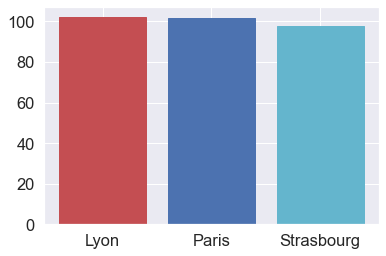

In [151]:
sub_df = df[["villes","Profit"]].merge(df_RaiseUnicornes[["Profit","RATIO"]],how="inner"
                           ,on="Profit")

barplot = plt.bar(height = sub_df[["villes","RATIO"]].groupby("villes").mean()["RATIO"],x=sub_df[["villes","RATIO"]].groupby("villes").mean().index)
barplot[0].set_color("r")
barplot[1].set_color("b")
barplot[2].set_color("c")
plt.show()
